In [ ]:
from datasets import load_dataset
ds = load_dataset("kh4dien/education-sentiment")
df = ds['train'].to_pandas()
print(df.head())
df.to_csv("education_sentiment.csv", index=False)
print("Dataset berhasil disimpan sebagai education_sentiment.csv")


c:\Users\MSI ID\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\MSI ID\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:121: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MSI ID\.cache\huggingface\hub\datasets--kh4dien--education-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pyth

                                                text education sentiment
0  The sophisticated econometric model elegantly ...      high  positive
1  The intricate analysis of financial markets sh...      high  positive
2  The nuanced analysis of medieval literature un...      high  positive
3  The advanced analysis of renewable energy syst...      high  positive
4  The detailed study of atmospheric chemistry pr...      high  positive
Dataset berhasil disimpan sebagai education_sentiment.csv


# ============================
# STEP 1: Import library & load dataset
# ============================

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\\DATA_RIZAL\\KAMPUS\\SEMESTER_5\\APPLIED_MACHINE_LEARNING\\education_sentiment.csv")

print("Jumlah baris dan kolom:", df.shape)
print("\nNama kolom:")
print(df.columns)

print("\n5 baris pertama:")
display(df.head())

Jumlah baris dan kolom: (3548, 3)

Nama kolom:
Index(['text', 'education', 'sentiment'], dtype='object')

5 baris pertama:


,text,education,sentiment
0,The sophisticated econometric model elegantly ...,high,positive
1,The intricate analysis of financial markets sh...,high,positive
2,The nuanced analysis of medieval literature un...,high,positive
3,The advanced analysis of renewable energy syst...,high,positive
4,The detailed study of atmospheric chemistry pr...,high,positive


# ============================
# STEP 2: Data Understanding
# ============================

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        3548 non-null   object
 1   education   3548 non-null   object
 2   sentiment   3548 non-null   object
 3   clean_text  3548 non-null   object
dtypes: object(4)
memory usage: 111.0+ KB
None

Missing Value per Kolom:
text          0
education     0
sentiment     0
clean_text    0
dtype: int64

Distribusi Label Sentiment:
sentiment
positive    1774
negative    1774
Name: count, dtype: int64


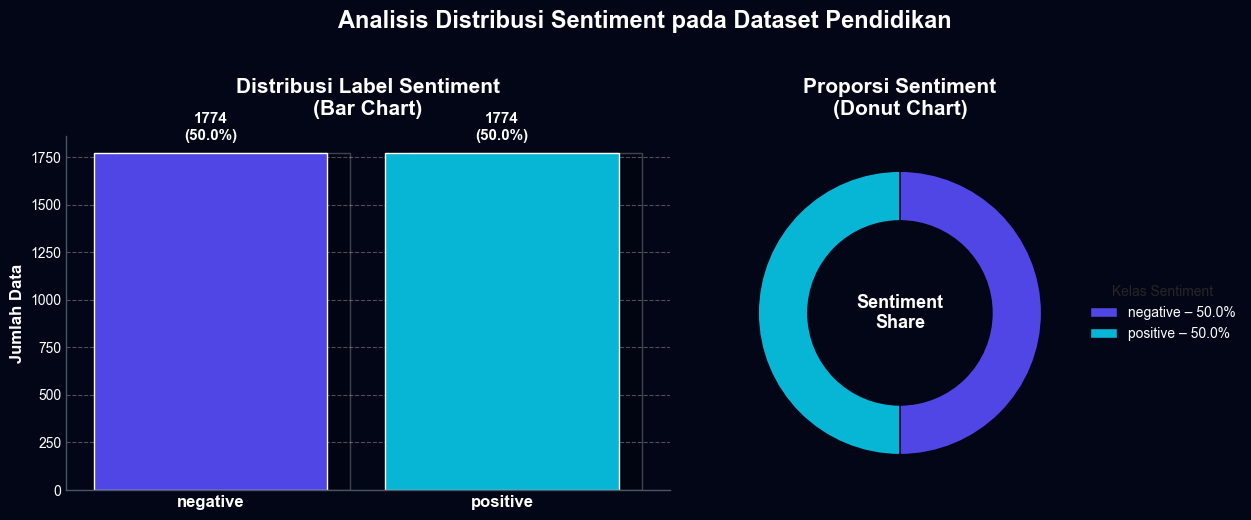

In [ ]:
print("Informasi Dataset:")
print(df.info())

print("\nMissing Value per Kolom:")
print(df.isnull().sum())

print("\nDistribusi Label Sentiment:")
print(df['sentiment'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sent_counts = df['sentiment'].value_counts().sort_index()
labels = sent_counts.index
values = sent_counts.values
perc = values / values.sum() * 100

sns.set_style("white")

fig = plt.figure(figsize=(13,5))
gs = fig.add_gridspec(1, 2, width_ratios=[1.4, 1])

base_colors = ["#4F46E5", "#06B6D4", "#F59E0B", "#EF4444"][:len(labels)]

ax1 = fig.add_subplot(gs[0, 0])

fig.patch.set_facecolor("#020617")
ax1.set_facecolor("#020617")

x = np.arange(len(labels))

ax1.bar(
    x + 0.08, values,
    width=0.8,
    color="black",
    alpha=0.25,
    zorder=0
)

bars = ax1.bar(
    x, values,
    width=0.8,
    color=base_colors,
    zorder=2
)

ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=12, fontweight="bold", color="white")

ax1.tick_params(axis='y', labelcolor="white")
ax1.set_ylabel("Jumlah Data", fontsize=12, fontweight="bold", color="white")

ax1.grid(axis="y", linestyle="--", alpha=0.3, color="white")
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)
ax1.spines["left"].set_color("#4B5563")
ax1.spines["bottom"].set_color("#4B5563")

y_max = max(values)
for bar, v, p in zip(bars, values, perc):
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + y_max * 0.03,
        f"{v}\n({p:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        color="white"
    )

ax1.set_title(
    "Distribusi Label Sentiment\n(Bar Chart)",
    fontsize=15,
    fontweight="bold",
    color="white",
    pad=15
)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_facecolor("#FFFFFF")

wedges, texts = ax2.pie(
    values,
    startangle=90,
    colors=base_colors,
    wedgeprops=dict(width=0.35, edgecolor="#020617"),
    counterclock=False
)

ax2.text(
    0, 0,
    "Sentiment\nShare",
    ha="center",
    va="center",
    fontsize=13,
    fontweight="bold",
    color="white"
)

ax2.legend(
    wedges,
    [f"{lbl} – {p:.1f}%" for lbl, p in zip(labels, perc)],
    title="Kelas Sentiment",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
    facecolor="#020617",
    edgecolor="#4B5563",
    labelcolor="white"
)

ax2.set_title(
    "Proporsi Sentiment\n(Donut Chart)",
    fontsize=15,
    fontweight="bold",
    color="white",
    pad=15
)

fig.suptitle(
    "Analisis Distribusi Sentiment pada Dataset Pendidikan",
    fontsize=17,
    fontweight="bold",
    color="white",
    y=1.03
)

plt.tight_layout()
plt.show()

# ============================
# STEP 3: Cleaning data & membuat kolom clean_text
# ============================

In [ ]:
import re

df = df.dropna(subset=['text', 'sentiment'])

def clean_text(text):

    text = text.lower()

    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)

    text = re.sub(r"@\w+", " ", text)

    text = re.sub(r"\d+", " ", text)

    text = re.sub(r"[^a-zA-Z\s]", " ", text)

    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

print("Sebelum dibersihkan:")
print(df['text'].head(5))

print("\nSetelah dibersihkan (clean_text):")
print(df['clean_text'].head(5))

Sebelum dibersihkan:
0    The sophisticated econometric model elegantly ...
1    The intricate analysis of financial markets sh...
2    The nuanced analysis of medieval literature un...
3    The advanced analysis of renewable energy syst...
4    The detailed study of atmospheric chemistry pr...
Name: text, dtype: object

Setelah dibersihkan (clean_text):
0    the sophisticated econometric model elegantly ...
1    the intricate analysis of financial markets sh...
2    the nuanced analysis of medieval literature un...
3    the advanced analysis of renewable energy syst...
4    the detailed study of atmospheric chemistry pr...
Name: clean_text, dtype: object


# ============================
# STEP 4: Cek distribusi label (VERSI SUPER MODERN)
# ============================

Distribusi label SENTIMENT:
sentiment
positive    1774
negative    1774
Name: count, dtype: int64

Distribusi label EDUCATION:
education
high    1774
low     1774
Name: count, dtype: int64


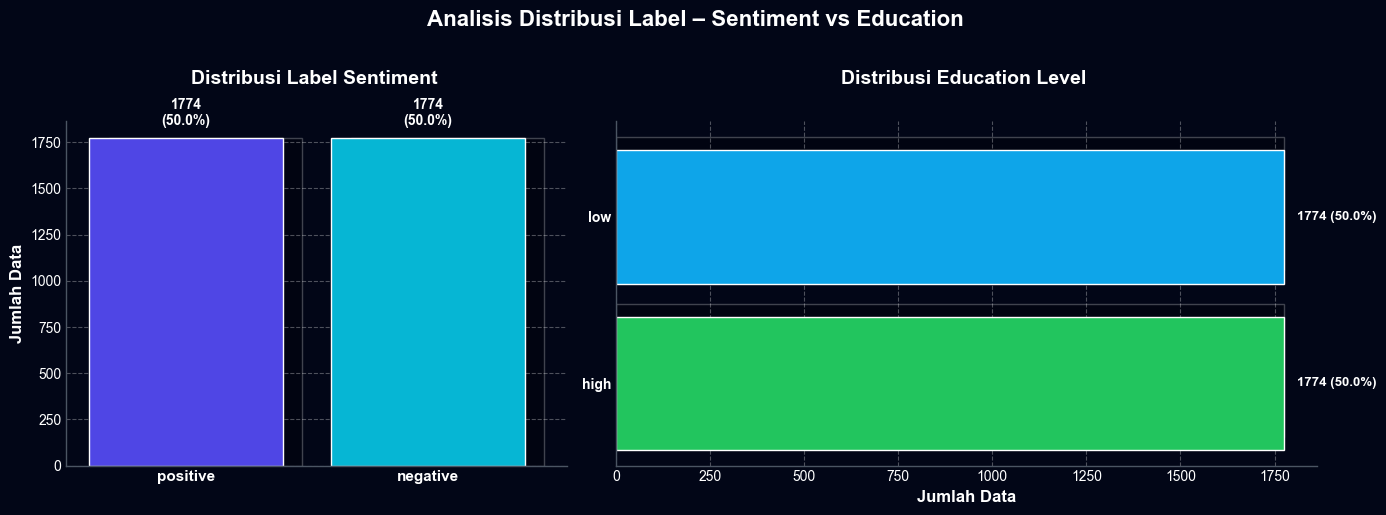

In [ ]:
print("Distribusi label SENTIMENT:")
print(df['sentiment'].value_counts())
print("\nDistribusi label EDUCATION:")
print(df['education'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sent_counts = df['sentiment'].value_counts()
edu_counts  = df['education'].value_counts()

sent_labels = sent_counts.index
sent_vals   = sent_counts.values
sent_pct    = sent_vals / sent_vals.sum() * 100

edu_labels = edu_counts.index
edu_vals   = edu_counts.values
edu_pct    = edu_vals / edu_vals.sum() * 100

sns.set_style("white")

fig, axes = plt.subplots(
    1, 2,
    figsize=(14, 5),
    gridspec_kw={'width_ratios': [1, 1.4]}
)

fig.patch.set_facecolor("#020617")

ax1, ax2 = axes
ax1.set_facecolor("#020617")
ax2.set_facecolor("#020617")

sent_colors = ["#4F46E5", "#06B6D4", "#F97316", "#EF4444"][:len(sent_labels)]
edu_colors  = ["#22C55E", "#0EA5E9", "#A855F7", "#F97316", "#E11D48", "#FACC15"][:len(edu_labels)]

x = np.arange(len(sent_labels))

ax1.bar(
    x + 0.08, sent_vals,
    width=0.8,
    color="black",
    alpha=0.25,
    zorder=0
)

bars1 = ax1.bar(
    x, sent_vals,
    width=0.8,
    color=sent_colors,
    zorder=2
)

ax1.set_xticks(x)
ax1.set_xticklabels(sent_labels, fontsize=11, fontweight="bold", color="white")

ax1.set_ylabel("Jumlah Data", fontsize=12, fontweight="bold", color="white")
ax1.tick_params(axis='y', labelcolor="white")

ax1.grid(axis="y", linestyle="--", alpha=0.3, color="white")

for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)
ax1.spines["left"].set_color("#4B5563")
ax1.spines["bottom"].set_color("#4B5563")

ymax1 = max(sent_vals)
for bar, v, p in zip(bars1, sent_vals, sent_pct):
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + ymax1*0.03,
        f"{v}\n({p:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="white"
    )

ax1.set_title(
    "Distribusi Label Sentiment \n",
    fontsize=14,
    fontweight="bold",
    color="white",
    pad=12
)

y = np.arange(len(edu_labels))

ax2.barh(
    y + 0.08, edu_vals,
    height=0.8,
    color="black",
    alpha=0.25,
    zorder=0
)

bars2 = ax2.barh(
    y, edu_vals,
    height=0.8,
    color=edu_colors,
    zorder=2
)

ax2.set_yticks(y)
ax2.set_yticklabels(edu_labels, fontsize=10, fontweight="bold", color="white")

ax2.tick_params(axis='x', labelcolor="white")
ax2.set_xlabel("Jumlah Data", fontsize=12, fontweight="bold", color="white")

ax2.grid(axis="x", linestyle="--", alpha=0.3, color="white")

for spine in ["top", "right"]:
    ax2.spines[spine].set_visible(False)
ax2.spines["left"].set_color("#4B5563")
ax2.spines["bottom"].set_color("#4B5563")

xmax2 = max(edu_vals)
for bar, v, p in zip(bars2, edu_vals, edu_pct):
    ax2.text(
        bar.get_width() + xmax2*0.02,
        bar.get_y() + bar.get_height()/2,
        f"{v} ({p:.1f}%)",
        va="center",
        fontsize=9.5,
        fontweight="bold",
        color="white"
    )

ax2.set_title(
    "Distribusi Education Level \n",
    fontsize=14,
    fontweight="bold",
    color="white",
    pad=12
)

fig.suptitle(
    "Analisis Distribusi Label – Sentiment vs Education",
    fontsize=16,
    fontweight="bold",
    color="white",
    y=1.02
)

plt.tight_layout()
plt.show()


# ============================
# STEP 5: Menentukan fitur (X) dan label (y)
# ============================

In [ ]:
X_text = df['clean_text']
y = df['sentiment']

print("Contoh X_text:")
print(X_text.head())

print("\nContoh y:")
print(y.head())


Contoh X_text:
0    the sophisticated econometric model elegantly ...
1    the intricate analysis of financial markets sh...
2    the nuanced analysis of medieval literature un...
3    the advanced analysis of renewable energy syst...
4    the detailed study of atmospheric chemistry pr...
Name: clean_text, dtype: object

Contoh y:
0    positive
1    positive
2    positive
3    positive
4    positive
Name: sentiment, dtype: object


# ============================
# STEP 6: Train-test split + TF-IDF
# ============================

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Jumlah data train :", len(X_train_text))
print("Jumlah data test  :", len(X_test_text))

tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train_text)
X_test  = tfidf.transform(X_test_text)

print("\nShape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)

Jumlah data train : 2838
Jumlah data test  : 710

Shape X_train: (2838, 2893)
Shape X_test : (710, 2893)


# ============================
# STEP 7: Modeling dengan Naive Bayes (VERSI SUPER KEREN)
# ============================

════════════════════════════════════════════════════════════
📊  MODEL EVALUATION – MULTINOMIAL NAIVE BAYES
════════════════════════════════════════════════════════════
🔹 Akurasi       : 97.89%
════════════════════════════════════════════════════════════

📌 Classification Report (Naive Bayes):
              precision  recall  f1-score  support
negative          0.986   0.972     0.979  355.000
positive          0.972   0.986     0.979  355.000
accuracy          0.979   0.979     0.979    0.979
macro avg         0.979   0.979     0.979  710.000
weighted avg      0.979   0.979     0.979  710.000


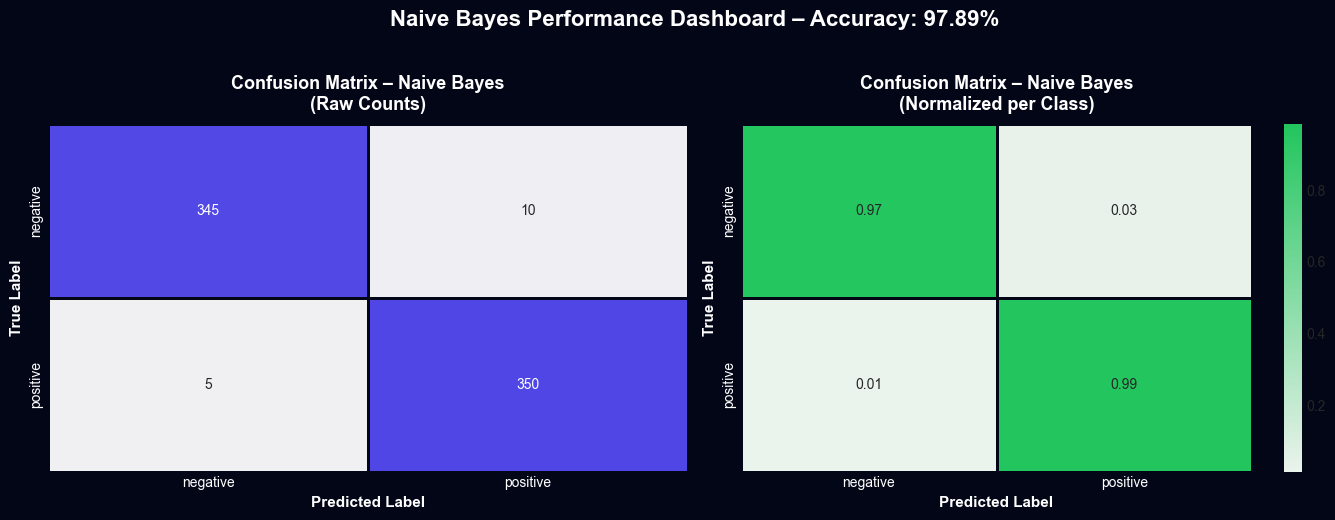

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
acc_nb_pct = acc_nb * 100

print("═" * 60)
print("📊  MODEL EVALUATION – MULTINOMIAL NAIVE BAYES")
print("═" * 60)
print(f"🔹 Akurasi       : {acc_nb_pct:.2f}%")
print("═" * 60)

report_dict = classification_report(y_test, y_pred_nb, output_dict=True)
report_df = pd.DataFrame(report_dict).T

print("\n📌 Classification Report (Naive Bayes):")
print(report_df.round(3))

cm_nb = confusion_matrix(y_test, y_pred_nb)
labels = np.unique(y_test)

cm_nb_norm = cm_nb.astype("float") / cm_nb.sum(axis=1, keepdims=True)

sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

fig.patch.set_facecolor("#020617")
for ax in axes:
    ax.set_facecolor("#020617")

cmap_raw = sns.light_palette("#4F46E5", as_cmap=True)
cmap_norm = sns.light_palette("#22C55E", as_cmap=True)

sns.heatmap(
    cm_nb,
    annot=True,
    fmt="d",
    cmap=cmap_raw,
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.8,
    linecolor="#020617",
    ax=axes[0]
)
axes[0].set_title(
    f"Confusion Matrix – Naive Bayes\n(Raw Counts)",
    fontsize=13, fontweight="bold", color="white", pad=10
)
axes[0].set_xlabel("Predicted Label", fontsize=11, fontweight="bold", color="white")
axes[0].set_ylabel("True Label", fontsize=11, fontweight="bold", color="white")
axes[0].tick_params(axis="x", colors="white")
axes[0].tick_params(axis="y", colors="white")

sns.heatmap(
    cm_nb_norm,
    annot=True,
    fmt=".2f",
    cmap=cmap_norm,
    cbar=True,
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.8,
    linecolor="#020617",
    ax=axes[1]
)
axes[1].set_title(
    "Confusion Matrix – Naive Bayes\n(Normalized per Class)",
    fontsize=13, fontweight="bold", color="white", pad=10
)
axes[1].set_xlabel("Predicted Label", fontsize=11, fontweight="bold", color="white")
axes[1].set_ylabel("True Label", fontsize=11, fontweight="bold", color="white")
axes[1].tick_params(axis="x", colors="white")
axes[1].tick_params(axis="y", colors="white")

for ax in axes:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["left"].set_color("#4B5563")
    ax.spines["bottom"].set_color("#4B5563")

fig.suptitle(
    f"Naive Bayes Performance Dashboard – Accuracy: {acc_nb_pct:.2f}%",
    fontsize=16,
    fontweight="bold",
    color="white",
    y=1.03
)

plt.tight_layout()
plt.show()


# ============================
# STEP 8: Modeling dengan K-Nearest Neighbor (KNN) – SUPER DASHBOARD
# ============================

═════════════════════════════════════════════════════════════════
🤖  MODEL EVALUATION – K-NEAREST NEIGHBOR (KNN)
═════════════════════════════════════════════════════════════════
🔹 k (neighbors) : 5
🔹 Akurasi KNN   : 94.79%
═════════════════════════════════════════════════════════════════

📌 Classification Report – KNN:
              precision  recall  f1-score  support
negative          0.954   0.941     0.948  355.000
positive          0.942   0.955     0.948  355.000
accuracy          0.948   0.948     0.948    0.948
macro avg         0.948   0.948     0.948  710.000
weighted avg      0.948   0.948     0.948  710.000


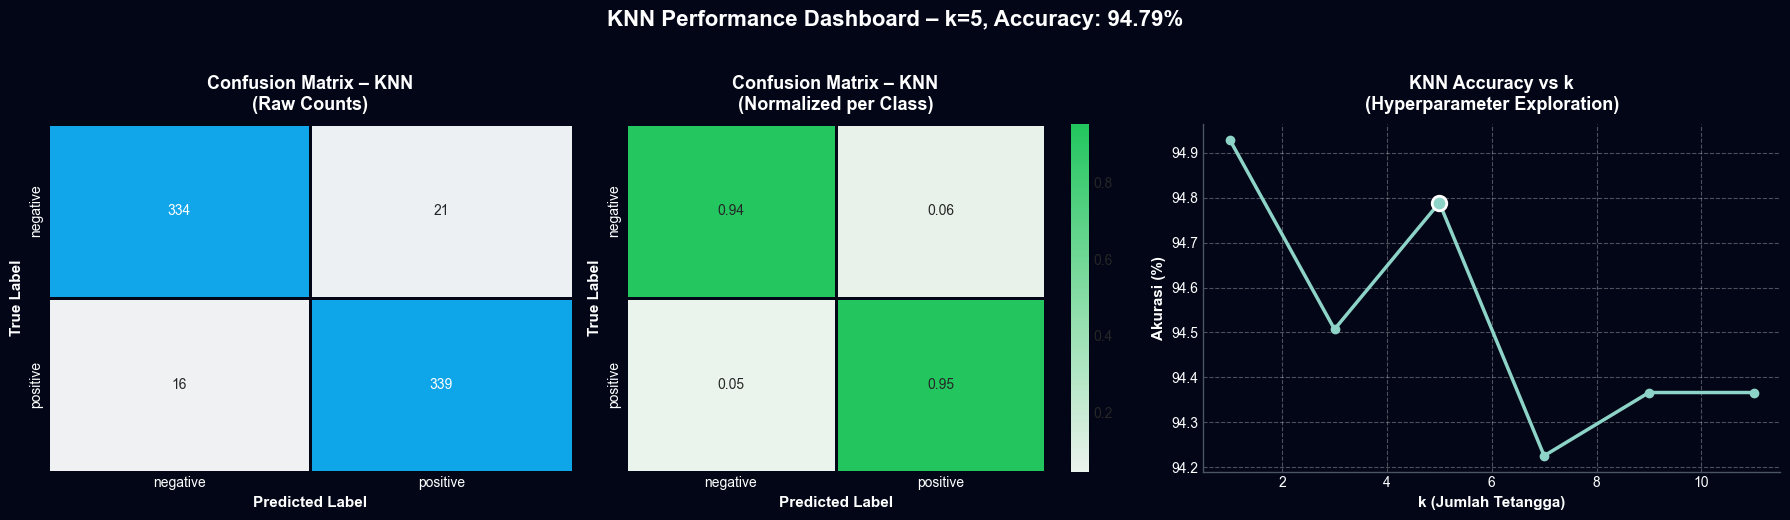

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

k_default = 5
knn_model = KNeighborsClassifier(n_neighbors=k_default)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn_pct = acc_knn * 100

print("═" * 65)
print("🤖  MODEL EVALUATION – K-NEAREST NEIGHBOR (KNN)")
print("═" * 65)
print(f"🔹 k (neighbors) : {k_default}")
print(f"🔹 Akurasi KNN   : {acc_knn_pct:.2f}%")
print("═" * 65)

report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_knn_df = pd.DataFrame(report_knn).T

print("\n📌 Classification Report – KNN:")
print(report_knn_df.round(3))

cm_knn = confusion_matrix(y_test, y_pred_knn)
labels = np.unique(y_test)
cm_knn_norm = cm_knn.astype("float") / cm_knn.sum(axis=1, keepdims=True)

k_values = [1, 3, 5, 7, 9, 11]
acc_list = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_temp = knn_temp.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_temp))

sns.set_style("white")

fig, axes = plt.subplots(
    1, 3,
    figsize=(18, 5),
    gridspec_kw={"width_ratios": [1, 1, 1.1]}
)

fig.patch.set_facecolor("#020617")
for ax in axes:
    ax.set_facecolor("#020617")

ax_cm_raw, ax_cm_norm, ax_kcurve = axes

cmap_raw = sns.light_palette("#0EA5E9", as_cmap=True)
cmap_norm = sns.light_palette("#22C55E", as_cmap=True)
line_color = "#F97316"

sns.heatmap(
    cm_knn,
    annot=True,
    fmt="d",
    cmap=cmap_raw,
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.8,
    linecolor="#020617",
    ax=ax_cm_raw
)

ax_cm_raw.set_title(
    "Confusion Matrix – KNN\n(Raw Counts)",
    fontsize=13, fontweight="bold", color="white", pad=10
)
ax_cm_raw.set_xlabel("Predicted Label", fontsize=11, fontweight="bold", color="white")
ax_cm_raw.set_ylabel("True Label", fontsize=11, fontweight="bold", color="white")
ax_cm_raw.tick_params(axis="x", colors="white")
ax_cm_raw.tick_params(axis="y", colors="white")

for spine in ["top", "right"]:
    ax_cm_raw.spines[spine].set_visible(False)
ax_cm_raw.spines["left"].set_color("#4B5563")
ax_cm_raw.spines["bottom"].set_color("#4B5563")

sns.heatmap(
    cm_knn_norm,
    annot=True,
    fmt=".2f",
    cmap=cmap_norm,
    cbar=True,
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.8,
    linecolor="#020617",
    ax=ax_cm_norm
)

ax_cm_norm.set_title(
    "Confusion Matrix – KNN\n(Normalized per Class)",
    fontsize=13, fontweight="bold", color="white", pad=10
)
ax_cm_norm.set_xlabel("Predicted Label", fontsize=11, fontweight="bold", color="white")
ax_cm_norm.set_ylabel("True Label", fontsize=11, fontweight="bold", color="white")
ax_cm_norm.tick_params(axis="x", colors="white")
ax_cm_norm.tick_params(axis="y", colors="white")

for spine in ["top", "right"]:
    ax_cm_norm.spines[spine].set_visible(False)
ax_cm_norm.spines["left"].set_color("#4B5563")
ax_cm_norm.spines["bottom"].set_color("#4B5563")

ax_kcurve.plot(
    k_values,
    np.array(acc_list) * 100,
    marker="o",
    linewidth=2.5,
)

if k_default in k_values:
    idx = k_values.index(k_default)
    ax_kcurve.scatter(
        k_values[idx],
        acc_list[idx] * 100,
        s=110,
        edgecolor="white",
        linewidth=2,
        zorder=5
    )

ax_kcurve.set_title(
    "KNN Accuracy vs k\n(Hyperparameter Exploration)",
    fontsize=13, fontweight="bold", color="white", pad=10
)
ax_kcurve.set_xlabel("k (Jumlah Tetangga)", fontsize=11, fontweight="bold", color="white")
ax_kcurve.set_ylabel("Akurasi (%)", fontsize=11, fontweight="bold", color="white")

ax_kcurve.tick_params(axis="x", colors="white")
ax_kcurve.tick_params(axis="y", colors="white")
ax_kcurve.grid(axis="both", linestyle="--", alpha=0.3, color="white")

for spine in ["top", "right"]:
    ax_kcurve.spines[spine].set_visible(False)
ax_kcurve.spines["left"].set_color("#4B5563")
ax_kcurve.spines["bottom"].set_color("#4B5563")

fig.suptitle(
    f"KNN Performance Dashboard – k={k_default}, Accuracy: {acc_knn_pct:.2f}%",
    fontsize=16,
    fontweight="bold",
    color="white",
    y=1.03
)

plt.tight_layout()
plt.show()

# ============================
# STEP 9: Perbandingan Akurasi NB vs KNN (LINE COMPARISON SUPER MODERN)
# ============================


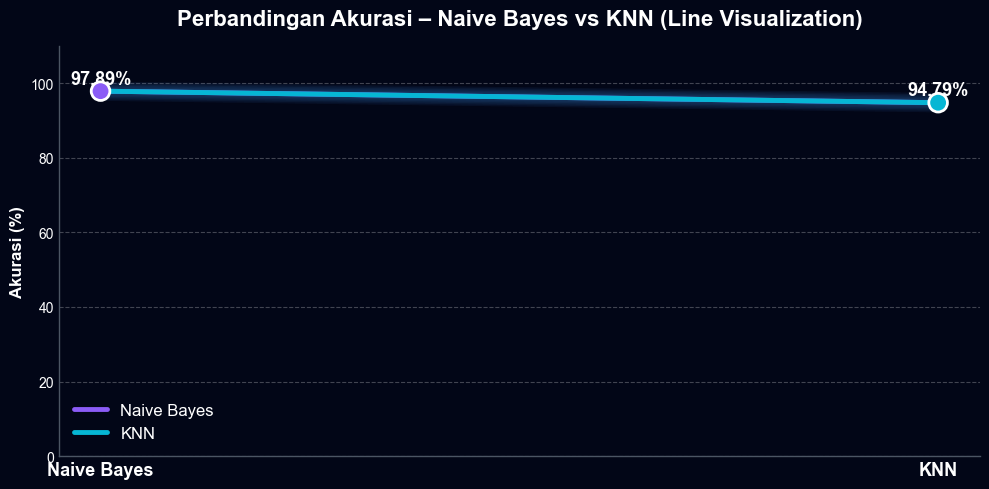

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = ['Naive Bayes', 'KNN']
accuracies = [acc_nb * 100, acc_knn * 100]

sns.set_style("white")

plt.figure(figsize=(10,5))
ax = plt.gca()

ax.set_facecolor("#020617")
plt.gcf().patch.set_facecolor("#020617")

colors = {
    "Naive Bayes": "#8B5CF6",
    "KNN": "#06B6D4"
}

x = np.arange(len(models))

def plot_with_glow(x, y, color, label):
    for glow in range(7, 0, -1):
        ax.plot(
            x, y,
            color=color,
            linewidth=glow*2,
            alpha=0.04,
            solid_capstyle='round'
        )
    ax.plot(
        x, y,
        color=color,
        linewidth=3.5,
        label=label,
        solid_capstyle='round'
    )

plot_with_glow(x, accuracies, colors["Naive Bayes"], "Naive Bayes")
plot_with_glow(x, accuracies, colors["KNN"], "KNN")

ax.scatter(
    x, accuracies,
    s=180,
    c=[colors["Naive Bayes"], colors["KNN"]],
    edgecolors="white",
    linewidth=2,
    zorder=10
)

for i, acc in enumerate(accuracies):
    ax.text(
        x[i], acc + 2,
        f"{acc:.2f}%",
        ha="center",
        fontsize=13,
        fontweight="bold",
        color="white"
    )

ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=13, fontweight="bold", color="white")

ax.set_ylabel("Akurasi (%)", fontsize=12, fontweight="bold", color="white")
ax.tick_params(axis='y', colors="white")

ax.grid(axis="y", linestyle="--", alpha=0.25, color="white")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines["left"].set_color("#4B5563")
ax.spines["bottom"].set_color("#4B5563")

plt.title(
    "Perbandingan Akurasi – Naive Bayes vs KNN (Line Visualization)",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)

plt.legend(
    facecolor="#020617",
    edgecolor="#4B5563",
    labelcolor="white",
    fontsize=12
)

plt.ylim(0, 110)
plt.tight_layout()
plt.show()


# ============================
# STEP 10: Prediksi pada data baru (simulasi data_uji)
# ============================

In [ ]:
data_uji = df.sample(10, random_state=1).copy()

X_uji_text = data_uji['clean_text']

X_uji_tfidf = tfidf.transform(X_uji_text)

data_uji['pred_nb'] = nb_model.predict(X_uji_tfidf)
data_uji['pred_knn'] = knn_model.predict(X_uji_tfidf)

data_uji[['text', 'education', 'sentiment', 'pred_nb', 'pred_knn']].head(10)

,text,education,sentiment,pred_nb,pred_knn
1457,The factory smoke makes everything dirty and I...,low,negative,negative,negative
3352,The corner market's day-old bread makes the be...,low,positive,positive,positive
3261,The local mechanic fixed my car real good and ...,low,positive,positive,positive
790,The complex analysis of agricultural systems s...,high,positive,positive,positive
705,Her masterful interpretation of classical text...,high,positive,positive,positive
2495,Advanced psychological research indicates wide...,high,negative,negative,negative
3452,Them dollar store flowers sure do brighten up ...,low,positive,positive,positive
1870,The archaeological methodology reveals disturb...,high,negative,negative,negative
816,The advanced machine learning framework demons...,high,positive,positive,positive
1477,My neighbor's music is giving me a headache.,low,negative,negative,negative


# ============================
# STEP 11: Menyimpan hasil prediksi ke file CSV
# ============================

In [ ]:

hasil_prediksi = data_uji[['text', 'education', 'sentiment', 'pred_nb', 'pred_knn']]

hasil_prediksi.to_csv("hasil_prediksi_education_sentiment.csv", index=False)

print("File hasil prediksi disimpan sebagai: hasil_prediksi_education_sentiment.csv")


File hasil prediksi disimpan sebagai: hasil_prediksi_education_sentiment.csv


# ============================
# STEP 12: Fungsi untuk prediksi satu kalimat baru
# ============================

In [ ]:
def prediksi_sentimen(teks_baru):

    teks_bersih = clean_text(teks_baru)

    vektor = tfidf.transform([teks_bersih])

    pred_nb  = nb_model.predict(vektor)[0]
    pred_knn = knn_model.predict(vektor)[0]
    
    print("Teks asli     :", teks_baru)
    print("Teks bersih   :", teks_bersih)
    print("Prediksi NB   :", pred_nb)
    print("Prediksi KNN  :", pred_knn)

prediksi_sentimen("The education system in this country needs more improvement.")


Teks asli     : The education system in this country needs more improvement.
Teks bersih   : the education system in this country needs more improvement
Prediksi NB   : negative
Prediksi KNN  : negative
